In [1]:
# Group by customer id, find high value customers

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [3]:
data = pd.read_csv('BlackFriday.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df = data.copy()

In [5]:
cat_cols = df.select_dtypes(['object']).columns
df[cat_cols] =  df[cat_cols].apply(lambda x: x.astype('category').cat.codes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null int16
Gender                        537577 non-null int8
Age                           537577 non-null int8
Occupation                    537577 non-null int64
City_Category                 537577 non-null int8
Stay_In_Current_City_Years    537577 non-null int8
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int16(1), int64(5), int8(4)
memory usage: 31.8 MB


In [6]:
for column in df.columns:
    if df[column].isnull().sum():
        df[column+'_isnull'] =  df[column].isnull()
        df[column].fillna(np.mean(df[column]),inplace=True)

In [7]:
X = df.drop('Purchase',axis=1).copy()
y = df['Purchase'].copy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
model = RandomForestRegressor(n_estimators = 30, min_samples_leaf=3)
%time model.fit(X_train,y_train)

CPU times: user 1min 7s, sys: 547 ms, total: 1min 8s
Wall time: 1min 8s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
model.score(X_test,y_test)

0.6971747301999589

In [11]:
feat_imp_df = pd.DataFrame({'cols':X_train.columns,
                            'importance':model.feature_importances_})\
                                .sort_values('importance',ascending=False)
feat_imp_df

,cols,importance
8,Product_Category_1,0.696206
0,User_ID,0.084244
1,Product_ID,0.082639
4,Occupation,0.038257
6,Stay_In_Current_City_Years,0.021684
3,Age,0.020758
9,Product_Category_2,0.014194
5,City_Category,0.012187
10,Product_Category_3,0.011043
7,Marital_Status,0.008620


In [12]:
feat_imp_df.plot('cols','importance','barh',figsize=(12,7))

In [13]:
pc1_dummies = pd.get_dummies(df['Product_Category_1'],prefix='PC1_')
dums_df = df.copy()
dums_df.drop(['Product_Category_2_isnull','Product_Category_3_isnull','Marital_Status','Gender'],
            axis=1,inplace=True)
dums_df = dums_df.join(pc1_dummies)

In [14]:
X,y = dums_df.drop('Purchase',axis=1),dums_df['Purchase']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
model = RandomForestRegressor(n_estimators = 30, min_samples_leaf=3)
%time model.fit(X_train,y_train)
model.score(X_test,y_test)

CPU times: user 1min 17s, sys: 1.15 s, total: 1min 18s
Wall time: 1min 24s


0.6946529912916792

In [17]:
feat_imp_df = pd.DataFrame({'cols':X_train.columns,
                            'importance':model.feature_importances_})\
                                .sort_values('importance',ascending=False)
feat_imp_df

,cols,importance
6,Product_Category_1,0.423969
14,PC1__6,0.119179
0,User_ID,0.091272
1,Product_ID,0.083795
18,PC1__10,0.066258
3,Occupation,0.040426
15,PC1__7,0.029766
5,Stay_In_Current_City_Years,0.022850
2,Age,0.022019
12,PC1__4,0.020398


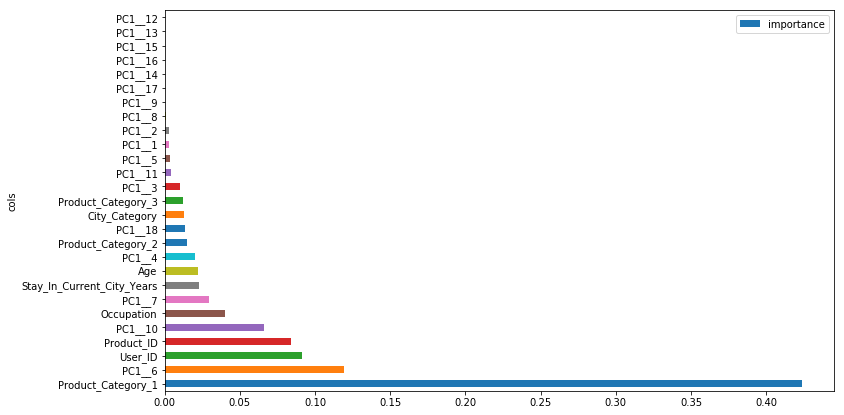

In [18]:
feat_imp_df.plot('cols','importance','barh',figsize=(12,7))

In [19]:
model_list = [DecisionTreeRegressor,LinearRegression,KNeighborsRegressor,
 RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor]

for model in model_list:
    model = model()
    %time model.fit(X_train,y_train)
    print('Model: {}, Score: {}'.format(model,model.score(X_test,y_test)))

CPU times: user 4.86 s, sys: 159 ms, total: 5.01 s
Wall time: 5.21 s
Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), Score: 0.4202390239336161
CPU times: user 812 ms, sys: 207 ms, total: 1.02 s
Wall time: 723 ms
Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), Score: 0.629956675613015
CPU times: user 2.46 s, sys: 28.4 ms, total: 2.49 s
Wall time: 2.31 s
Model: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'), Score: 0.1588427040298085
CPU times: user 28 s, sys: 426 ms, total: 28.4 s
Wall time: 28.6 s
Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=N

In [41]:
customer_df = dums_df.copy()
customer_df.drop(['Age','Occupation','City_Category','Stay_In_Current_City_Years','Product_Category_1',
                 'Product_Category_2','Product_Category_3','Product_ID'],axis=1,inplace=True)
customer_df = customer_df.groupby('User_ID').sum()

In [48]:
customer_df = customer_df.reset_index()

In [67]:
user_data = dums_df[['User_ID','Age','Occupation','City_Category','Stay_In_Current_City_Years']]
user_data = user_data.groupby('User_ID').mean()

In [69]:
customer_df = customer_df.join(user_data,on='User_ID',how='left',lsuffix='_one_hot',rsuffix='_info')

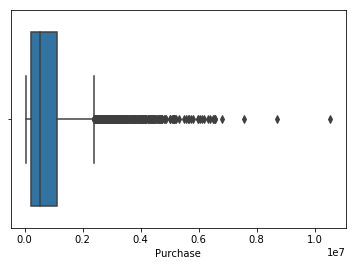

In [76]:
sns.boxplot(customer_df.Purchase)

In [80]:
customer_df.Purchase.mean()

851751.5494822611

In [81]:
customer_df.Purchase.std()

932997.8127747579

In [82]:
customer_df.Purchase.describe()

count    5.891000e+03
mean     8.517515e+05
std      9.329978e+05
min      4.410800e+04
25%      2.349140e+05
50%      5.126120e+05
75%      1.099005e+06
max      1.053678e+07
Name: Purchase, dtype: float64

In [85]:
customer_df.Purchase.median()

512612.0

In [87]:
customer_df.Purchase.quantile(q=.75)

1099005.0

In [88]:
customer_df['high_value_customer'] = np.where(customer_df.Purchase >= 1099005, 1, 0)

In [90]:
customer_df.drop('Purchase',axis=1,inplace=True)

In [92]:
customer_df.drop('User_ID',axis=1,inplace=True)

In [94]:
X,y = customer_df.drop('high_value_customer',axis=1),customer_df['high_value_customer']

In [97]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
rf_model = RandomForestClassifier(n_estimators=40,max_features='sqrt',min_samples_leaf=3)
%time rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

CPU times: user 165 ms, sys: 6.84 ms, total: 172 ms
Wall time: 171 ms


0.9758354755784062

In [100]:
gb_model = GradientBoostingClassifier(n_estimators=40,max_features='sqrt',min_samples_leaf=3)
%time gb_model.fit(X_train,y_train)
gb_model.score(X_test,y_test)

CPU times: user 94.2 ms, sys: 4.34 ms, total: 98.5 ms
Wall time: 98.8 ms


0.9701799485861182

In [125]:
import shap, pdpbox
shap.initjs()

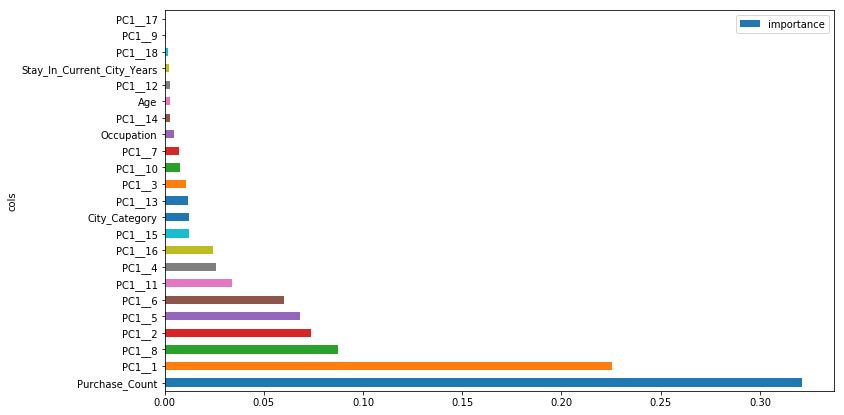

In [105]:
feat_imp_df = pd.DataFrame({'cols':X_train.columns,
                            'importance':rf_model.feature_importances_})\
                                .sort_values('importance',ascending=False)
feat_imp_df.plot('cols','importance','barh',figsize=(12,7))

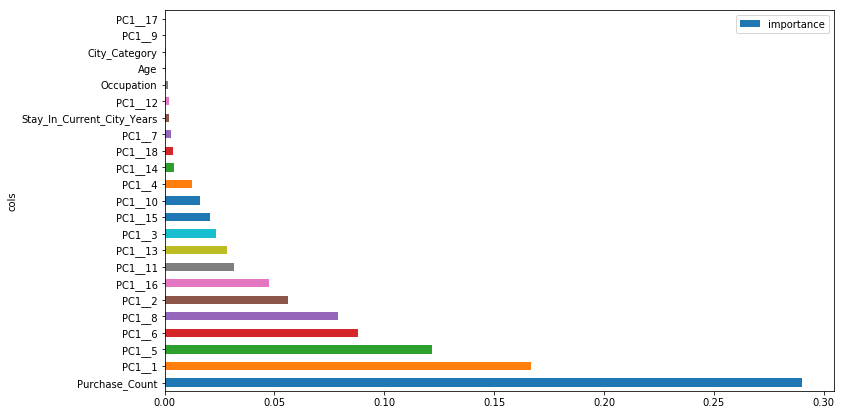

In [108]:
feat_imp_df = pd.DataFrame({'cols':X_train.columns,
                            'importance':gb_model.feature_importances_})\
                                .sort_values('importance',ascending=False)
feat_imp_df.plot('cols','importance','barh',figsize=(12,7))

In [109]:
X,y = customer_df.drop(['high_value_customer','Purchase_Count'],axis=1),customer_df['Purchase_Count']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [112]:
rf_model = RandomForestRegressor(n_estimators=40,max_features='sqrt',min_samples_leaf=3)
%time rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

CPU times: user 212 ms, sys: 8.82 ms, total: 221 ms
Wall time: 234 ms


0.9767968126370726

In [114]:
gb_model = GradientBoostingRegressor(n_estimators=40,max_features='sqrt',min_samples_leaf=3)
%time gb_model.fit(X_train,y_train)
gb_model.score(X_test,y_test)

CPU times: user 60.3 ms, sys: 3.17 ms, total: 63.4 ms
Wall time: 61.7 ms


0.9783974745524217

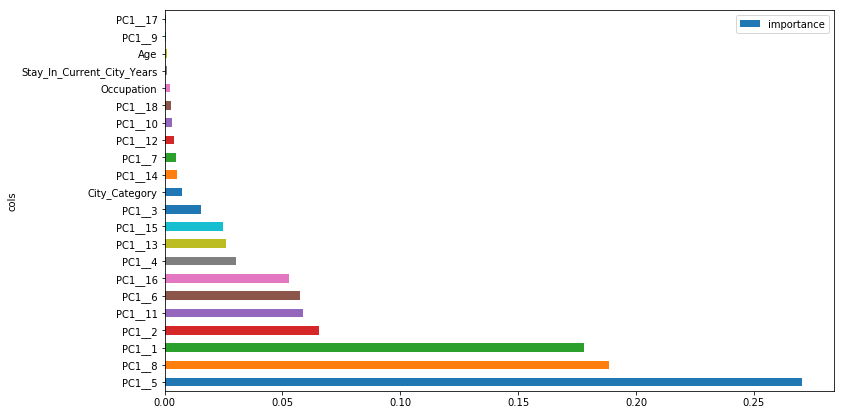

In [115]:
feat_imp_df = pd.DataFrame({'cols':X_train.columns,
                            'importance':rf_model.feature_importances_})\
                                .sort_values('importance',ascending=False)
feat_imp_df.plot('cols','importance','barh',figsize=(12,7))

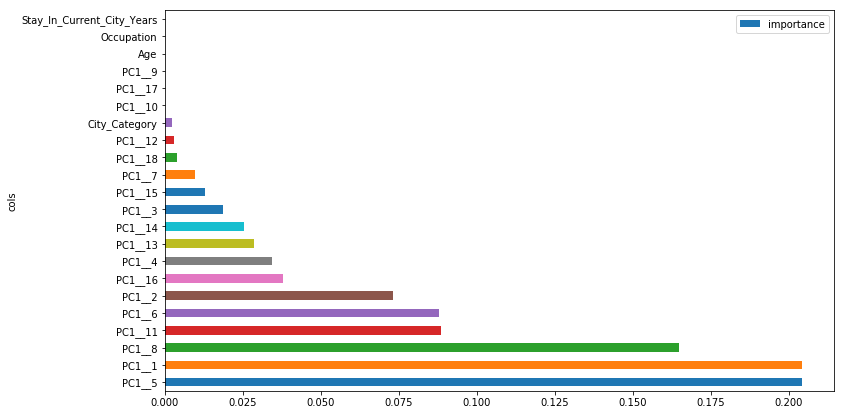

In [117]:
feat_imp_df = pd.DataFrame({'cols':X_train.columns,
                            'importance':gb_model.feature_importances_})\
                                .sort_values('importance',ascending=False)
feat_imp_df.plot('cols','importance','barh',figsize=(12,7))

In [118]:
explainer = shap.TreeExplainer(rf_model)

In [121]:
%time shap_values = explainer.shap_values(X_train)

CPU times: user 1min 10s, sys: 500 ms, total: 1min 10s
Wall time: 1min 11s


In [129]:
shap.force_plot(explainer.expected_value, shap_values[:300], X_train.iloc[:300,:])

In [128]:
shap.force_plot(explainer.expected_value, shap_values[477], X_train.iloc[477,:])

In [ ]:
from sklearn.metrics import mean_squared_error